# Inferring An Unknown Vector From Noisy Measurements

In [1]:
import numpy as np

In [2]:
# unknown vector x
x = np.array([0.5, 0.5])
# covariance of the measurements
sigma_y = np.array([[2, 1], [1, 1]])

# the mean of the measurement distribution is x and its covariance is sigma_y
mu, sigma = x, sigma_y
# the mean is separated to its components
x_mean, y_mean = mu.T

# multivariate Gaussian vector generator is created
rng = np.random.default_rng(seed=4362413)

num_of_measurements = 100
# generated vectors are separated into their components
measurement_array = rng.multivariate_normal(mean=mu, cov=sigma_y, size=num_of_measurements, check_valid='warn')
x, y = measurement_array.T

In [3]:
import matplotlib.pyplot as plt

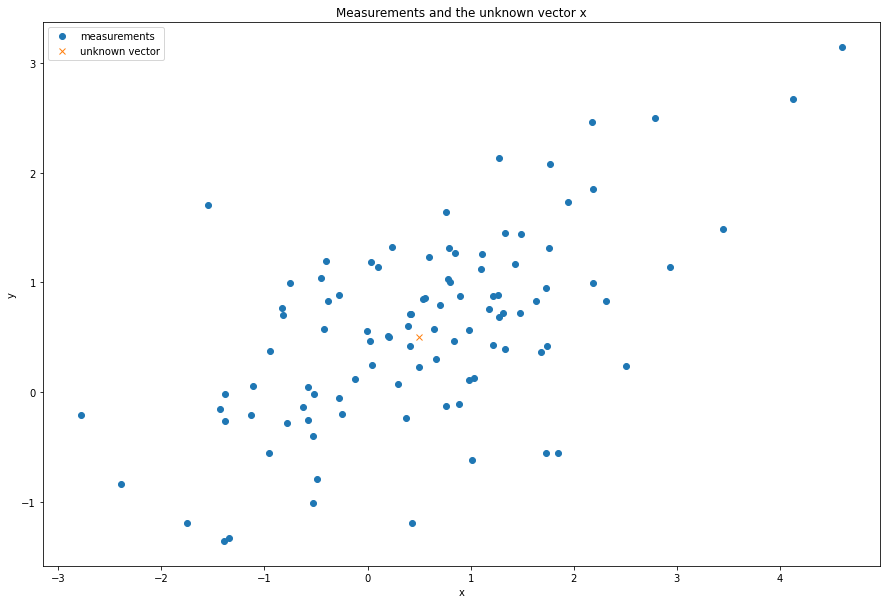

In [4]:
# the measurements and the unknown vector x are plotted
fig, ax = plt.subplots(figsize=(15, 10))
_ = ax.plot(x, y, 'o', label='measurements')
_ = ax.plot(x_mean, y_mean, 'x', label='unknown vector')
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels)
_ = ax.set_title('Measurements and the unknown vector x')
_ = plt.xlabel('x')
_ = plt.ylabel('y')

In [5]:
# the mean of the measurements is computed
y_bar = measurement_array.mean(axis=0)
y_bar = np.expand_dims(y_bar, 1)

# the mean and the covariance for the prior
mu_0 = np.zeros((2, 1))
sigma_x = 0.1 * np.eye(2)

# the covariance of the posterior (first form)
cov_post = sigma_x - np.matmul(np.matmul(sigma_x, np.linalg.inv(sigma_x+(sigma_y/num_of_measurements))), sigma_x)
print('The posterior covariance computed from the first form:')
print(cov_post)

# the covariance of the posterior (second form)
cov_post = np.linalg.inv(np.linalg.inv(sigma_x)+np.linalg.inv(sigma_y/num_of_measurements))
print('The posterior covariance computed from the second form:')
print(cov_post)

print('The first form and the second form for the posterior covariance yield the same result.')

# the mean of the posterior (first form)
mu_post = np.matmul(np.matmul((sigma_x-cov_post), np.linalg.inv(sigma_x)), y_bar)+np.matmul(np.matmul(cov_post, np.linalg.inv(sigma_x)), mu_0)
print('The posterior mean computed from the first form:')
print(mu_post)

# the mean of the posterior (second form)
mu_post = np.matmul(cov_post, (np.matmul(np.linalg.inv(sigma_y/num_of_measurements), y_bar)+np.matmul(np.linalg.inv(sigma_x), mu_0)))
print('The posterior mean computed from the second form:')
print(mu_post)

print('The first form and the second form for the posterior mean yield the same result.')

The posterior covariance computed from the first form:
[[0.01603053 0.00763359]
 [0.00763359 0.00839695]]
The posterior covariance computed from the second form:
[[0.01603053 0.00763359]
 [0.00763359 0.00839695]]
The first form and the second form for the posterior covariance yield the same result.
The posterior mean computed from the first form:
[[0.4019258 ]
 [0.48616127]]
The posterior mean computed from the second form:
[[0.4019258 ]
 [0.48616127]]
The first form and the second form for the posterior mean yield the same result.


In [6]:
print('Hence, the map estimate for the unknown vector x is as follows:')
print(mu_post)

Hence, the map estimate for the unknown vector x is as follows:
[[0.4019258 ]
 [0.48616127]]


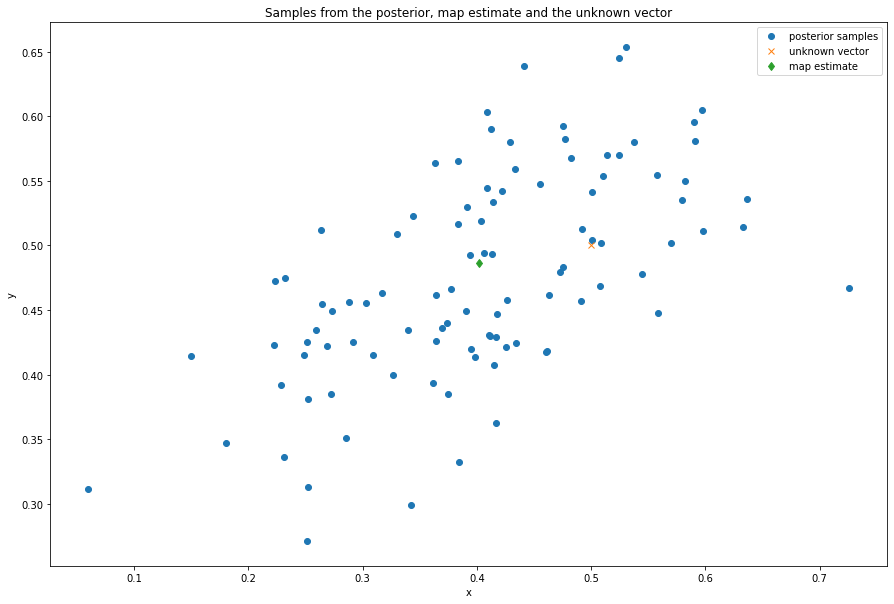

In [7]:
posterior_sample_size = 100
# samples are drawn from the posterior distribution and they are plotted
x_post, y_post = rng.multivariate_normal(mean=np.squeeze(mu_post, axis=1), cov=cov_post, size=posterior_sample_size, check_valid='warn').T

fig, ax = plt.subplots(figsize=(15, 10))
_ = ax.plot(x_post, y_post, 'o', label='posterior samples')
_ = ax.plot(x_mean, y_mean, 'x', label='unknown vector')
_ = ax.plot(mu_post[0, 0], mu_post[1, 0], 'd', label='map estimate')
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels)
_ = ax.set_title('Samples from the posterior, map estimate and the unknown vector')
_ = plt.xlabel('x')
_ = plt.ylabel('y')

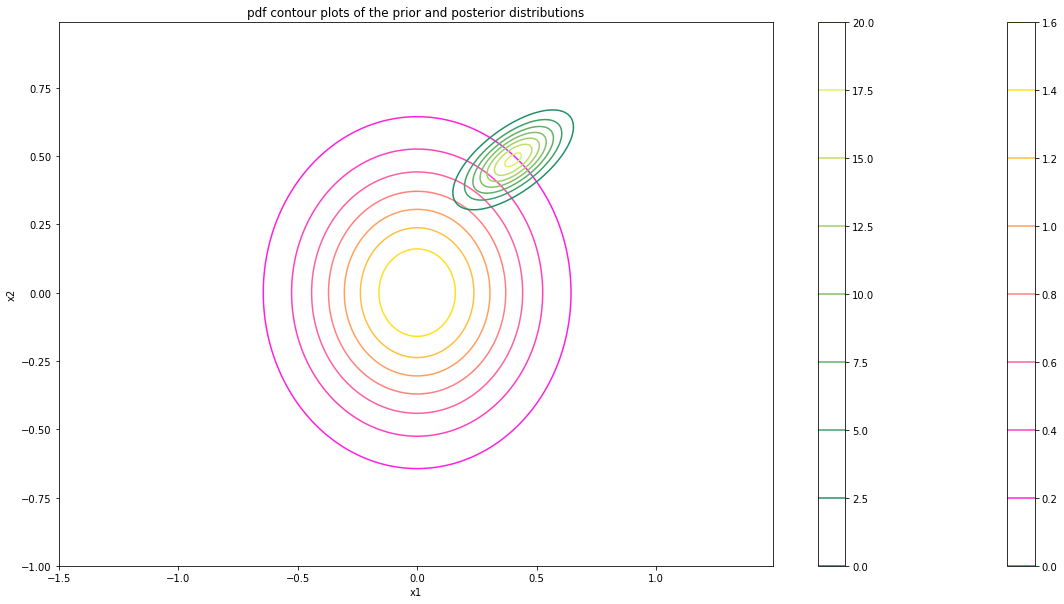

In [8]:
from scipy.stats import multivariate_normal

x_min = -1.5
x_max = 1.5
y_min = -1.0
y_max = 1.0
x, y = np.mgrid[x_min:x_max:.01, y_min:y_max:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y

rv1 = multivariate_normal(np.squeeze(mu_0, axis=1), sigma_x)
rv2 = multivariate_normal(np.squeeze(mu_post, axis=1), cov_post)

cmap1 = plt.cm.get_cmap("spring")
cmap2 = plt.cm.get_cmap("summer")

fig, ax = plt.subplots(figsize=(20, 10))
contour_plot_1 = ax.contour(x, y, rv1.pdf(pos), cmap=cmap1)
contour_plot_2 = ax.contour(x, y, rv2.pdf(pos), cmap=cmap2)
_ = fig.colorbar(contour_plot_1, ax=ax)
_ = fig.colorbar(contour_plot_2, ax=ax)

_ = ax.set_title('pdf contour plots of the prior and posterior distributions')
_ = plt.xlabel('x1')
_ = plt.ylabel('x2')

## References
[1] Machine Learning A Probabilistic Perspective, Kevin P. Murphy.

[2] Bayes Rule For A Linear Gaussian System, <https://saffetgokcensen.github.io/blog/2020/07/08/bayes-rule-for-a-linear-gaussian-system>